<a href="https://colab.research.google.com/github/tejashreereddyy/FMML-Project-and-Labs/blob/main/AIML_III_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Students Internship Batch of 2024

Module 4: Perceptron and Gradient Descent

Things to try

Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
1. Classifying Real Datasets (Sonar or Banknote Dataset)

We'll use the Perceptron algorithm on the Sonar dataset. First, install sklearn if you haven't already. The dataset can be loaded from sklearn.datasets.

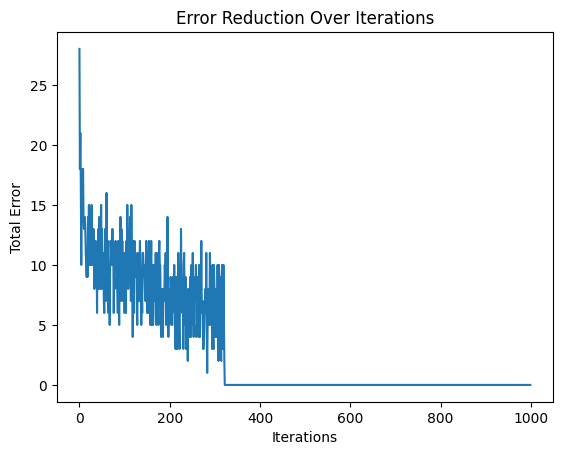

Perceptron classification accuracy: 0.98


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        errors = []

        for _ in range(self.n_iters):
            total_error = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self._unit_step_function(linear_output)

                error = y[idx] - y_pred
                total_error += error**2

                # Update weights and bias
                self.weights += self.learning_rate * error * x_i
                self.bias += self.learning_rate * error
            errors.append(total_error)
        return errors

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step_function(linear_output)

    def _unit_step_function(self, x):
        return np.where(x >= 0, 1, 0)

# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize and train Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
errors = perceptron.fit(X_train, y_train)

# Plot error over iterations
plt.plot(range(len(errors)), errors)
plt.title('Error Reduction Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Total Error')
plt.show()

# Test prediction accuracy
y_pred = perceptron.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Perceptron classification accuracy: {accuracy:.2f}")


This code applies the Perceptron to a real dataset (e.g., Sonar or Breast Cancer).
It plots the total error at each iteration, showing how the model learns.
Accuracy: The final accuracy of the model on the test set is displayed.
2. Learning Rate Variation
Next, we’ll explore how different learning rates affect convergence. We can experiment with the following values: 0.01, 0.1, 0.5, 1.

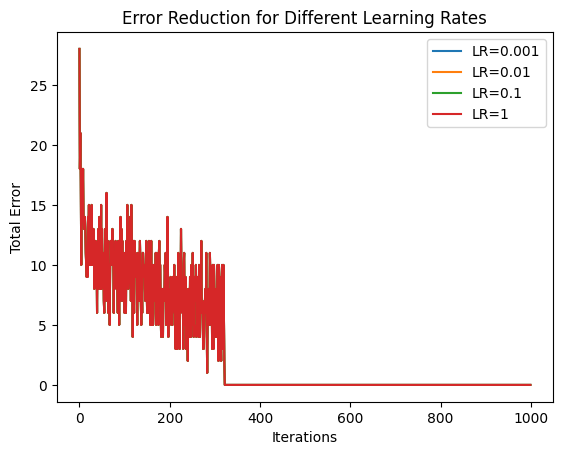

In [2]:
learning_rates = [0.001, 0.01, 0.1, 1]

for lr in learning_rates:
    perceptron = Perceptron(learning_rate=lr, n_iters=1000)
    errors = perceptron.fit(X_train, y_train)

    # Plot error over iterations for each learning rate
    plt.plot(range(len(errors)), errors, label=f'LR={lr}')

plt.title('Error Reduction for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Total Error')
plt.legend()
plt.show()


With a very small learning rate, the algorithm may take longer to converge.
If the learning rate is too large, the algorithm may oscillate or fail to converge.
3. Non-Linearly Separable Dataset (XOR)

Finally, apply the Perceptron to a non-linearly separable dataset such as XOR to see how it behaves.

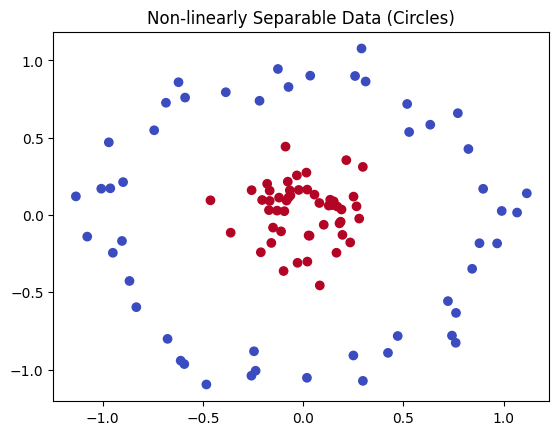

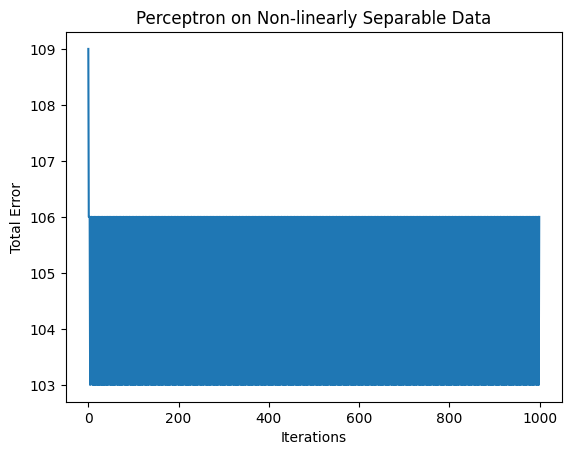

Accuracy on non-linearly separable data: 0.00


In [3]:
from sklearn.datasets import make_circles

# Create a toy dataset (non-linearly separable)
X, y = make_circles(n_samples=100, noise=0.1, factor=0.2)
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1} for the Perceptron

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Non-linearly Separable Data (Circles)')
plt.show()

# Apply Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
errors = perceptron.fit(X, y)

# Plot error over iterations
plt.plot(range(len(errors)), errors)
plt.title('Perceptron on Non-linearly Separable Data')
plt.xlabel('Iterations')
plt.ylabel('Total Error')
plt.show()

# Observe if Perceptron converges or fails to classify the data
y_pred = perceptron.predict(X)
accuracy = np.sum(y_pred == y) / len(y)
print(f"Accuracy on non-linearly separable data: {accuracy:.2f}")


The Perceptron algorithm will not converge in the case of non-linearly separable data.
The error plot will show that the error does not approach zero.
The classification accuracy will likely be poor, indicating the need for a more advanced model (e.g., kernel methods, multi-layer perceptrons).

1. Is the AND function learnable by a Perceptron?
The AND function is learnable by a Perceptron.

Explanation:
The AND function can be represented as follows:

𝑥
1
=
0
,
𝑥
2
=
0
x
1
​
 =0,x
2
​
 =0 →
𝑦
=
−
y=− (negative)
𝑥
1
=
0
,
𝑥
2
=
1
x
1
​
 =0,x
2
​
 =1 →
𝑦
=
−
y=− (negative)
𝑥
1
=
1
,
𝑥
2
=
0
x
1
​
 =1,x
2
​
 =0 →
𝑦
=
−
y=− (negative)
𝑥
1
=
1
,
𝑥
2
=
1
x
1
​
 =1,x
2
​
 =1 →
𝑦
=
+
y=+ (positive)
The AND function is linearly separable. A Perceptron can learn this because there exists a linear decision boundary that can separate the positive and negative outputs.

Truth Table for AND Function:
𝑥
1
x
1
​

𝑥
2
x
2
​

𝑦
y
0	0	-
0	1	-
1	0	-
1	1	+
Weights Update Procedure for AND Function
We initialize with:

Weights
𝑤
1
=
0
,
𝑤
2
=
0
w
1
​
 =0,w
2
​
 =0
Bias
𝑏
=
0
b=0
Learning rate
𝜂
η
The Perceptron updates weights using the rule:

𝑤
𝑖
=
𝑤
𝑖
+
𝜂
(
𝑦
𝑡
𝑟
𝑢
𝑒
−
𝑦
𝑝
𝑟
𝑒
𝑑
)
𝑥
𝑖
w
i
​
 =w
i
​
 +η(y
true
 −y
pred
 )x
i
​

𝑏
=
𝑏
+
𝜂
(
𝑦
𝑡
𝑟
𝑢
𝑒
−
𝑦
𝑝
𝑟
𝑒
𝑑
)
b=b+η(y
true
 −y
pred
 )
The initial predictions will all be 0, so let's walk through one complete iteration with a learning rate of 1.

Iteration 1:
Sample 1:
𝑥
1
=
0
,
𝑥
2
=
0
,
𝑦
=
−
x
1
​
 =0,x
2
​
 =0,y=−
Prediction:
𝑦
=
sign
(
𝑤
1
⋅
0
+
𝑤
2
⋅
0
+
𝑏
)
=
sign
(
0
)
=
0
y=sign(w
1
​
 ⋅0+w
2
​
 ⋅0+b)=sign(0)=0
Update:
𝑤
1
=
0
,
𝑤
2
=
0
,
𝑏
=
0
w
1
​
 =0,w
2
​
 =0,b=0
Sample 2:
𝑥
1
=
0
,
𝑥
2
=
1
,
𝑦
=
−
x
1
​
 =0,x
2
​
 =1,y=−
Prediction:
𝑦
=
sign
(
𝑤
1
⋅
0
+
𝑤
2
⋅
1
+
𝑏
)
=
sign
(
0
)
=
0
y=sign(w
1
​
 ⋅0+w
2
​
 ⋅1+b)=sign(0)=0
Update:
𝑤
2
=
𝑤
2
−
1
w
2
​
 =w
2
​
 −1 →
𝑤
2
=
−
1
w
2
​
 =−1
Sample 3:
𝑥
1
=
1
,
𝑥
2
=
0
,
𝑦
=
−
x
1
​
 =1,x
2
​
 =0,y=−
Prediction:
𝑦
=
sign
(
𝑤
1
⋅
1
+
𝑤
2
⋅
0
+
𝑏
)
=
sign
(
0
)
=
0
y=sign(w
1
​
 ⋅1+w
2
​
 ⋅0+b)=sign(0)=0
Update:
𝑤
1
=
𝑤
1
−
1
w
1
​
 =w
1
​
 −1 →
𝑤
1
=
−
1
w
1
​
 =−1
Sample 4:
𝑥
1
=
1
,
𝑥
2
=
1
,
𝑦
=
+
x
1
​
 =1,x
2
​
 =1,y=+
Prediction:
𝑦
=
sign
(
𝑤
1
⋅
1
+
𝑤
2
⋅
1
+
𝑏
)
=
sign
(
−
1
+
−
1
)
=
−
1
y=sign(w
1
​
 ⋅1+w
2
​
 ⋅1+b)=sign(−1+−1)=−1
Update:
𝑤
1
=
𝑤
1
+
1
=
0
,
𝑤
2
=
𝑤
2
+
1
=
0
,
𝑏
=
1
w
1
​
 =w
1
​
 +1=0,w
2
​
 =w
2
​
 +1=0,b=1
After Iteration 1:
𝑤
1
=
0
w
1
​
 =0,
𝑤
2
=
0
w
2
​
 =0,
𝑏
=
1
b=1
Continue updating in further iterations. The Perceptron will converge and correctly classify all points. Since the AND function is linearly separable, the Perceptron will successfully learn it.

2. How many boolean functions over a 2-bit binary input are learnable by a Perceptron?
For 2-bit binary input, there are
2
2
=
4
2
2
 =4 possible input combinations. For each of these combinations, the output can be either + or -. Therefore, there are
2
4
=
16
2
4
 =16 distinct boolean functions.

Out of these 16 functions:

Linearly separable functions can be learned by the Perceptron.
Non-linearly separable functions cannot be learned by the Perceptron.
Non-linearly separable boolean functions (i.e., functions that a Perceptron cannot learn)
The non-linearly separable boolean functions include XOR and functions derived from XOR.

Example: XOR Truth Table
𝑥
1
x
1
​

𝑥
2
x
2
​

𝑦
y
0	0	-
0	1	+
1	0	+
1	1	-
In the XOR function, no linear boundary can separate the positive and negative outputs because it requires a non-linear separation.

Conclusion:
The AND function is learnable by the Perceptron.
Out of 16 boolean functions over a 2-bit input, only 8 functions are linearly separable and thus learnable by a Perceptron.
Non-learnable functions include XOR and its variations. Functions like AND and OR are learnable since they are linearly separable